In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.transforms as mtransforms
import datetime as dt
import warnings
import subprocess
import unidecode
warnings.filterwarnings('ignore')
import copy
import os
import numpy as np

## Imports

In [2]:
df_imports_old = pd.read_csv('../input_files/old_files/COL_variant_imports.csv')
df_imports_new = pd.read_csv('../input_files/updated_files/COL_variant_imports.csv')
df_imports_used = pd.read_csv('../input_files/main_files_used/COL_variant_imports.csv')

df_imports_old['Date'] = pd.to_datetime(df_imports_old['Date'], format = '%Y-%m-%d')
df_imports_new['Date'] = pd.to_datetime(df_imports_new['Date'], format = '%Y-%m-%d')
df_imports_used['Date'] = pd.to_datetime(df_imports_used['Date'], format = '%Y-%m-%d')

del(df_imports_new['Unnamed: 0'])

In [3]:
df_imports_new.variant.unique()

array(['20A.EU2', '20A/S:126A', '20A/S:439K', '20A/S:98F', '20B/S:1122L',
       '20B/S:626S', '20B/S:732A', '20C/S:80Y', '20E (EU1)',
       '20H (Beta, V2)', '20I (Alpha, V1)', '20J (Gamma, V3)',
       '21A (Delta)', '21B (Kappa)', '21C (Epsilon)', '21D (Eta)',
       '21F (Iota)', '21G (Lambda)', '21H (Mu)', '21I (Delta)',
       '21J (Delta)', '21K (Omicron)', '21L (Omicron)', '22A (Omicron)',
       '22B (Omicron)', '22C (Omicron)', '22D (Omicron)', '22E (Omicron)',
       '22F (Omicron)', 'recombinant', 'S:677H.Robin1', 'S:677P.Pelican'],
      dtype=object)

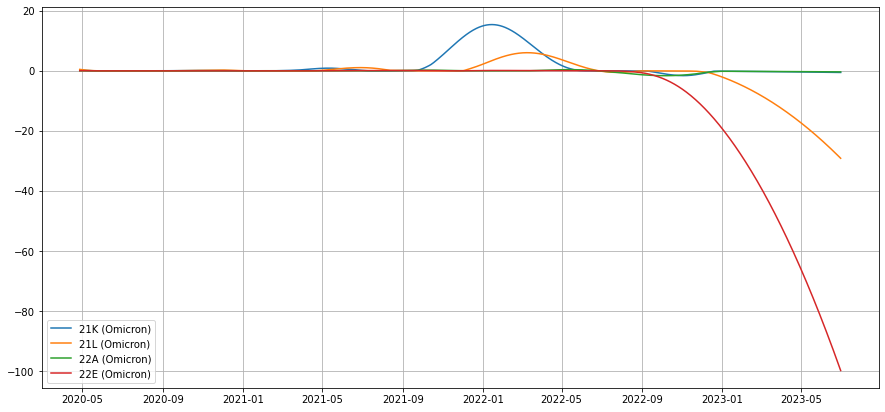

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(w=15, h=7)

vars_ = ['21K (Omicron)', '21L (Omicron)', '22A (Omicron)', '22E (Omicron)']

#'22B (Omicron)', '22C (Omicron)', '22D (Omicron)', , '22F (Omicron)'

for var in vars_:
    mask = df_imports_new['variant'] == var
    ax.plot(df_imports_new[mask].Date, df_imports_new[mask].TotalVariantImports, label=var)
    
ax.legend()
ax.grid()

In [5]:
df_imports_new

,variant,Date,PropVariantImports,Day,Imports,TotalVariantImports
0,20A.EU2,2020-04-27,0.000217,96,20.322977,0.004402
1,20A.EU2,2020-04-28,0.000205,97,19.807419,0.004052
2,20A.EU2,2020-04-29,0.000193,98,19.287432,0.003714
3,20A.EU2,2020-04-30,0.000181,99,18.763620,0.003387
4,20A.EU2,2020-05-01,0.000169,100,18.236580,0.003073
...,...,...,...,...,...,...
37115,S:677P.Pelican,2023-06-26,0.001875,1251,-57.299550,-0.107441
37116,S:677P.Pelican,2023-06-27,0.001885,1252,-57.456946,-0.108296
37117,S:677P.Pelican,2023-06-28,0.001895,1253,-57.614343,-0.109155
37118,S:677P.Pelican,2023-06-29,0.001904,1254,-57.771739,-0.110017


In [6]:
mask_old = df_imports_old['variant'] == '20J (Gamma, V3)'
masks_used = df_imports_used['variant'] == '20J (Gamma, V3)'

df_imports_used = df_imports_used.drop(df_imports_used[masks_used].index)
df_imports_used = pd.concat([df_imports_used, df_imports_old[mask_old]])
    
df_imports_new['Imports'] = np.abs(df_imports_new['Imports'])
df_imports_new['TotalVariantImports'] = np.abs(df_imports_new['TotalVariantImports'])
    
vars_ = ['21K (Omicron)', '21L (Omicron)', '22A (Omicron)', '22E (Omicron)']
for var in vars_:
    mask_new = df_imports_new['variant'] == var
    masks_used = df_imports_used['variant'] == var
    
    df_imports_used = df_imports_used.drop(df_imports_used[masks_used].index)
    df_imports_used = pd.concat([df_imports_used, df_imports_new[mask_new]])

22E (Omicron)


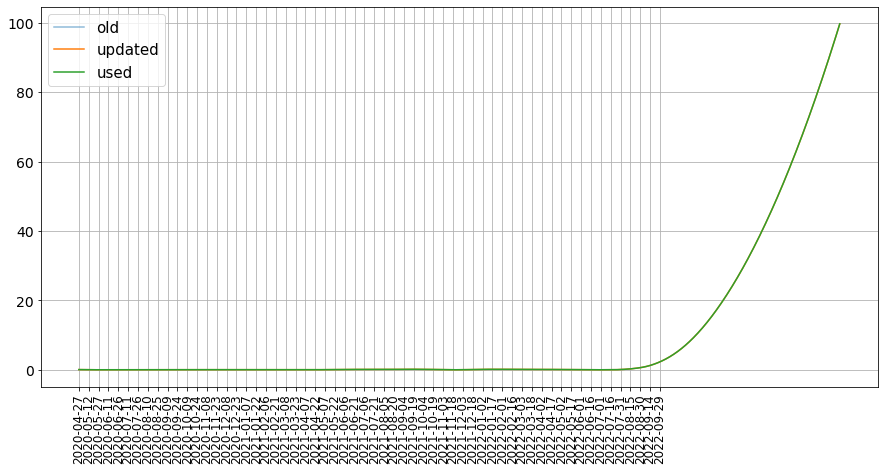

In [76]:
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots()
fig.set_size_inches(w=15, h=7)

vars_ = ['20I (Alpha, V1)', '20J (Gamma, V3)', '21A (Delta)', '21K (Omicron)', '21L (Omicron)', '22A (Omicron)', '22E (Omicron)']
variable = vars_[-1]
print(variable)

mask_old = df_imports_old['variant'] == variable
mask_new = df_imports_new['variant'] == variable
masks_used = df_imports_used['variant'] == variable

ax.plot(df_imports_old[mask_old].Date, df_imports_old[mask_old].TotalVariantImports, label = 'old', alpha= 0.5)
ax.plot(df_imports_new[mask_new].Date, df_imports_new[mask_new].TotalVariantImports, label = 'updated')
ax.plot(df_imports_used[masks_used].Date, df_imports_used[masks_used].TotalVariantImports, label = 'used')

plt.xticks(pd.date_range(df_imports_used[masks_used].Date.to_numpy()[0], periods=60, freq='15d'), rotation=90, fontsize=12)
plt.yticks(fontsize=14)
ax.legend()
ax.grid()

In [40]:
df_imports_used.to_csv('../input_files/COL_variant_imports.csv', index=False)

## init cases

In [67]:
folder = '../../scratch/FRED_11001_projections_asymp_1.00_fm_0.73_ksus_10.00_var_1_vax_070_mov_omicron_lineages_BQX'

In [68]:
file = 'initial_cases_plus_omicron_lineage_11001_1.txt'
df_init = pd.read_csv(f'{folder}/{file}', sep=' ').rename(columns={'21':'day_1', '21.1':'day_2', '2':'cases', '0':'var', '1':'XY', '2.1':'cases_2'})

In [73]:
df_select = df_init[df_init['var'] == 5]
df_select['date'] = df_select['day_1'].apply(lambda x: start_date + dt.timedelta(days=x))

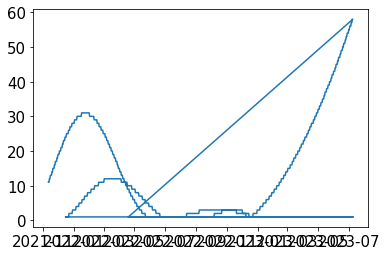

In [74]:
plt.plot(df_select['date'], df_select['cases'])

In [41]:
start_date = dt.date(2020,1,1)